#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15881060787349133582
]


In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [22]:
try:
    model_cc.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")
try:
    model_MSE.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")
try:
    model_bc.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型
載入模型失敗!開始訓練一個新模型
載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
model_MSE=model
model_cc=model
model_bc=model
model_MSE.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
model_cc.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_bc.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [24]:

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history_MSE=model_MSE.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 
train_history_cc=model_cc.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         
        
train_history_bc=model_bc.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Epoch 1/12
293/293 [==============================] - 53s 178ms/step - loss: 0.4113 - accuracy: 0.1105 - val_loss: 0.3670 - val_accuracy: 0.1810
Epoch 2/12
293/293 [==============================] - 51s 174ms/step - loss: 0.3330 - accuracy: 0.1325 - val_loss: 0.3627 - val_accuracy: 0.2180
Epoch 3/12
293/293 [==============================] - 50s 170ms/step - loss: 0.3278 - accuracy: 0.1555 - val_loss: 0.3598 - val_accuracy: 0.2446
Epoch 4/12
293/293 [==============================] - 50s 170ms/step - loss: 0.3237 - accuracy: 0.1719 - val_loss: 0.3566 - val_accuracy: 0.2668
Epoch 5/12
293/293 [==============================] - 50s 170ms/step - loss: 0.3191 - accuracy: 0.1892 - val_loss: 0.3522 - val_accuracy: 0.2762
Epoch 6/12
293/293 [==============================] - 50s 172ms/step - loss: 0.3137 - accuracy: 0.2088 - val_loss: 0.3459 - val_accuracy: 0.2920
Epoch 7/12
293/293 [==============================] - 52s 178ms/step - loss: 0.3080 - accuracy: 0.2312 - val_loss: 0.3408 - val_ac

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history_cc(train_acc,test_acc):
    plt.plot(train_history_cc.history[train_acc])
    plt.plot(train_history_cc.history[test_acc])
    plt.title('Train History_cc')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
def show_train_history_MSE(train_acc,test_acc):
    plt.plot(train_history_MSE.history[train_acc])
    plt.plot(train_history_MSE.history[test_acc])
    plt.title('Train History_MSE')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
def show_train_history_bc(train_acc,test_acc):
    plt.plot(train_history_bc.history[train_acc])
    plt.plot(train_history_bc.history[test_acc])
    plt.title('Train History_bc')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

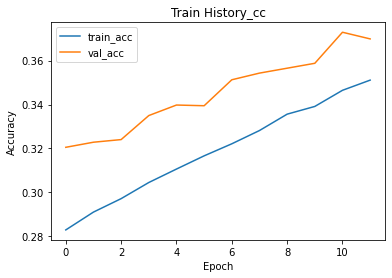

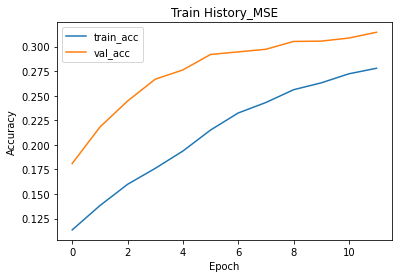

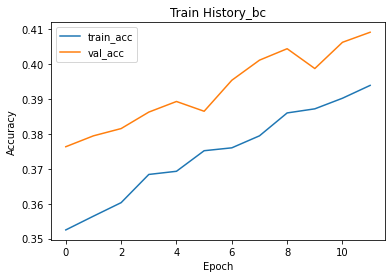

In [29]:
show_train_history_cc('accuracy','val_accuracy')
show_train_history_MSE('accuracy','val_accuracy')
show_train_history_bc('accuracy','val_accuracy')

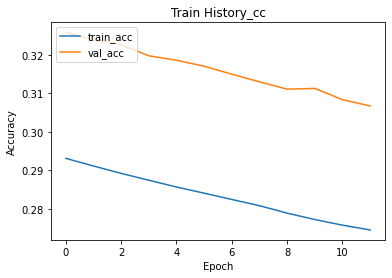

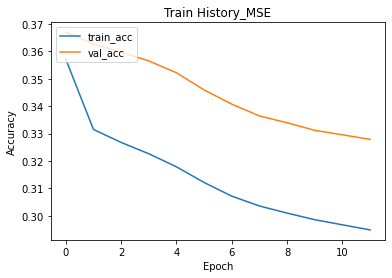

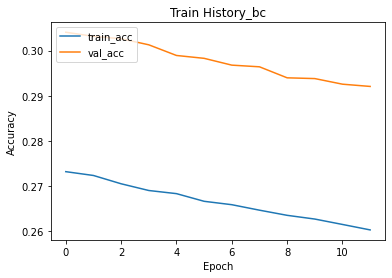

In [30]:
show_train_history_cc('loss','val_loss')
show_train_history_MSE('loss','val_loss')
show_train_history_bc('loss','val_loss')